# Artificial Intelligence - Local Search

Local Search Implementation to Search Solution for Diagonal Magic Cube.

## 0. Initiation

### 0.1 Import Modules

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Initiate Cubes and Global Variables

In [2]:
init_cube1 = [[[i+(5*j)+(25*k) for i in range(1,6)] for j in range(0,5)] for k in range(0,5)]
init_cube2 = [[[((i+(5*j)+(25*k)+42)%125 + 1) for i in range(1,6)] for j in range(0,5)] for k in range(0,5)]
init_cube3 = [[[((i+(5*j)+(25*k)+84)%125 + 1) for i in range(1,6)] for j in range(0,5)] for k in range(0,5)]
init_cubes = [init_cube1, init_cube2, init_cube3]

In [3]:
num_experiment = 3

### 0.3 Utils

In [4]:
def displayMatrixLayers(cube):
    matrix_3d = np.array(cube)
    global_min = matrix_3d.min()
    global_max = matrix_3d.max()

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    for i in range(5):
        layer = matrix_3d[i, :, :]
        
        row = i // 3
        col = i % 3

        sns.heatmap(layer, annot=True, fmt='d', cmap='plasma', ax=axes[row, col], 
                    cbar=False,
                    vmin=global_min,
                    vmax=global_max, 
                    xticklabels=[],
                    yticklabels=[])

        axes[row, col].set_title(f'Matrix Level {i + 1}')

    for j in range(i + 1, 6):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

In [5]:
def displayPlotValuePerIteration(values):
    array = np.array(values)
    
    x = np.arange(1, len(array) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(x, array, marker='o', linestyle='-', color='b', label='Objective Function Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.title('Objective Function per Iteration')
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
def displayPlotProbabilityMove(probs):
    data = probs
    
    x = np.array(list(data.keys()))
    y = np.array(list(data.values()))

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, marker='o', linestyle='-', color='r', label='Move Probability')
    plt.xlabel('Iteration')
    plt.ylabel('Move Probability')
    plt.title('Move Probability')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.show()

## 1. Steepest Ascent Hill-climbing

### 1.0. Program

In [6]:
from SteepestAscentHillClimbing import SteepestAscentHillClimbing
execution_time_each_experiment = []
cubes_each_experiment = []
values_each_experiment = []
iteration_each_experiment = []
for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, count_iter = SteepestAscentHillClimbing(cube)
    end_time = time.perf_counter()
    execution_time_each_experiment.append(end_time-start_time)
    
    cubes_each_experiment.append(cubes)
    values_each_experiment.append(values)
    iteration_each_experiment.append(count_iter)

### 1.1. First Experiment Result

In [11]:
print("Total iteration: ", iteration_each_experiment[0])
print("Execution time: ", execution_time_each_experiment[0])

Total iteration:  26
Execution time:  603.7818760999944


#### 1.1.1. Initial State

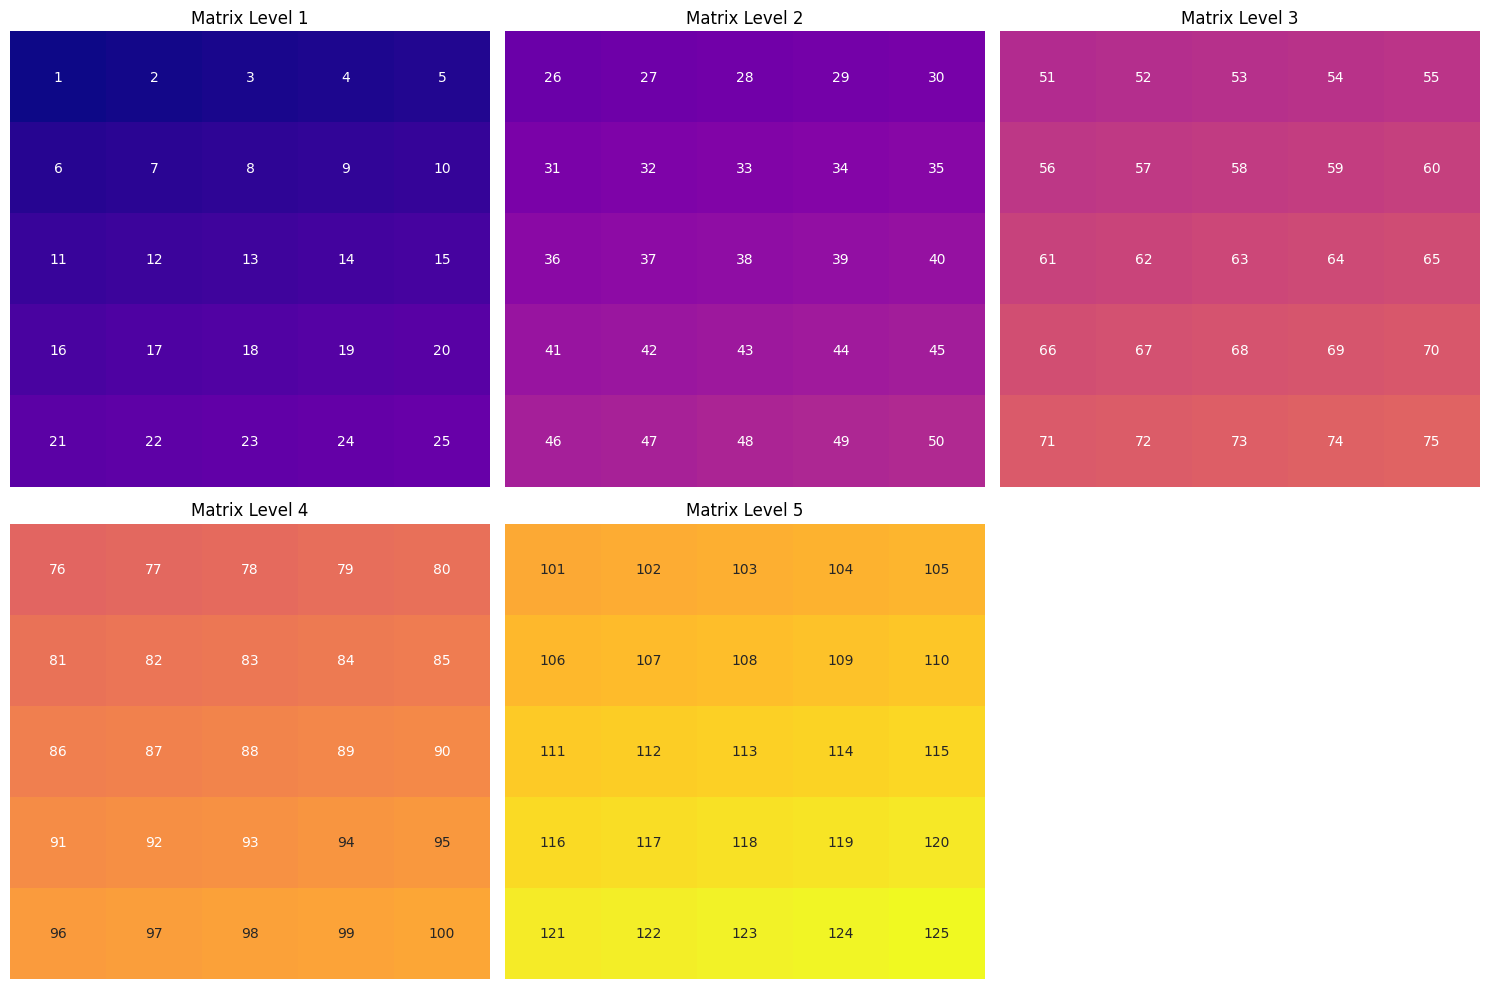

Objective Function Value:  -106


In [12]:
displayMatrixLayers(cubes_each_experiment[0][0])
print("Objective Function Value: ", values_each_experiment[0][0])

#### 1.1.2. Final State

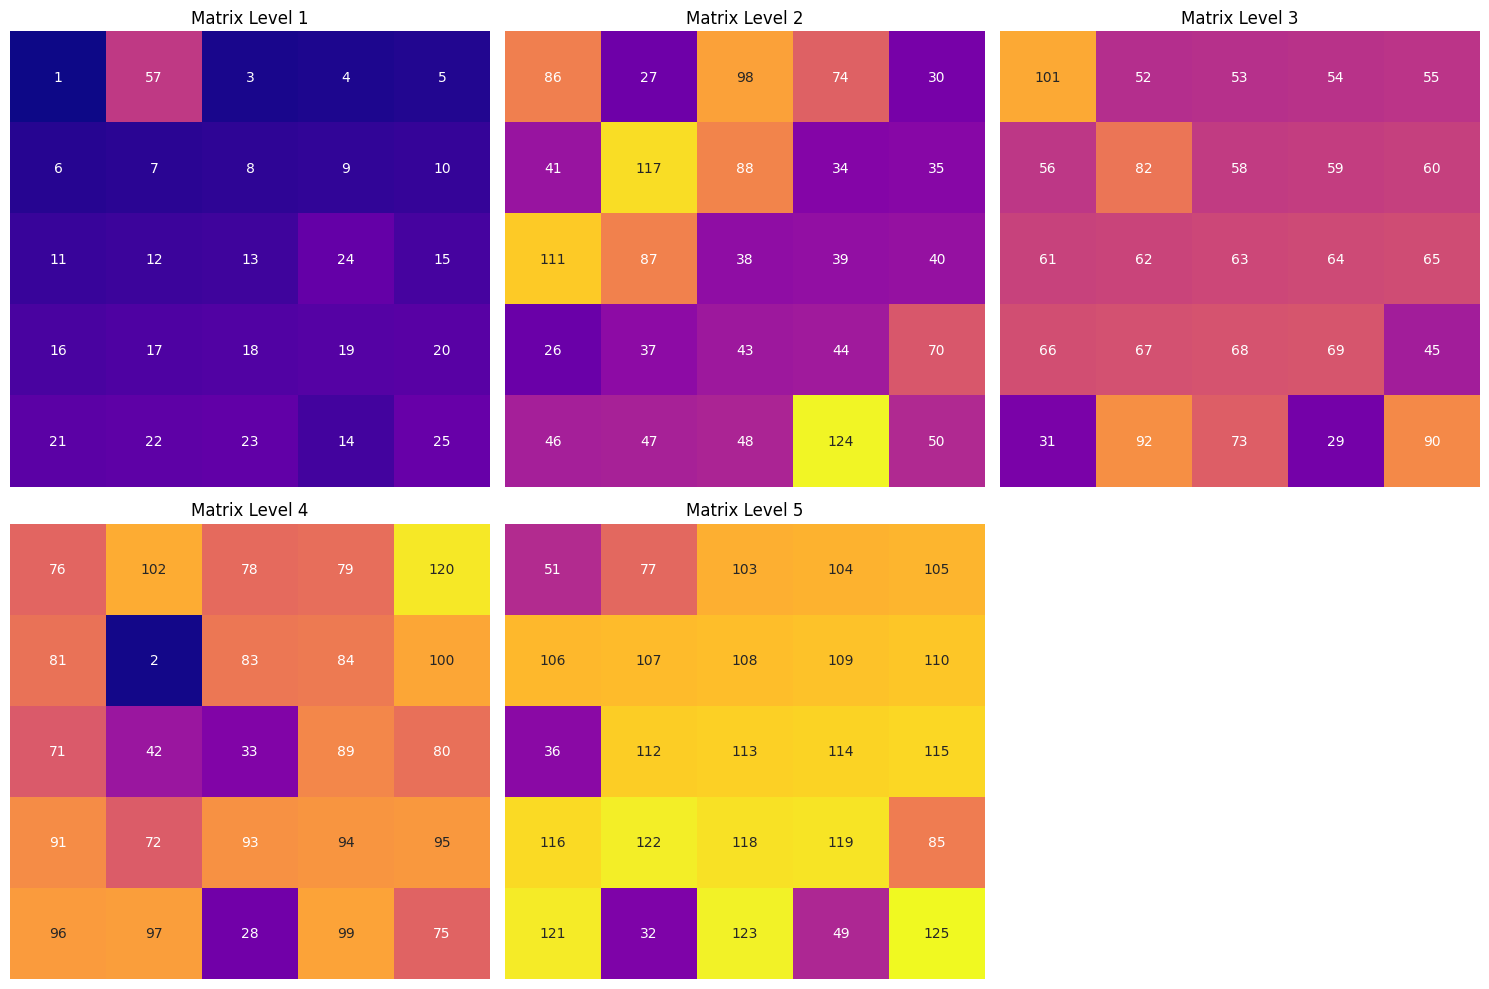

Objective Function Value:  -76


In [13]:
displayMatrixLayers(cubes_each_experiment[0][-1])
print("Objective Function Value: ", values_each_experiment[0][-1])

#### 1.1.3. Objective Function Value Plot on Each Iteration

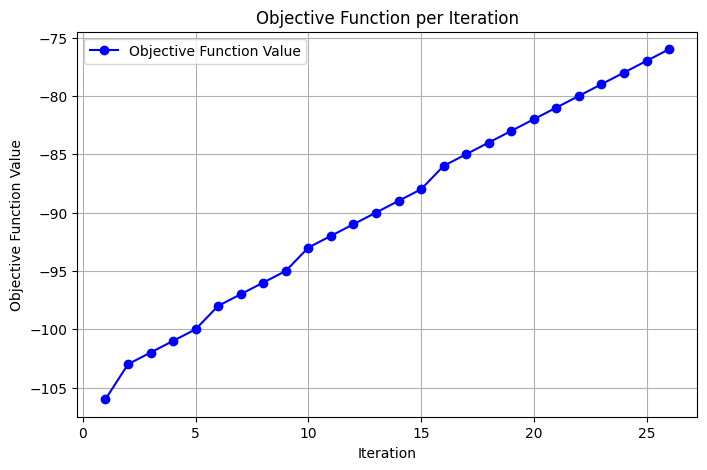

In [15]:
displayPlotValuePerIteration(values_each_experiment[0])

### 1.2. Second Experiment Result

#### 1.2.1. Initial State

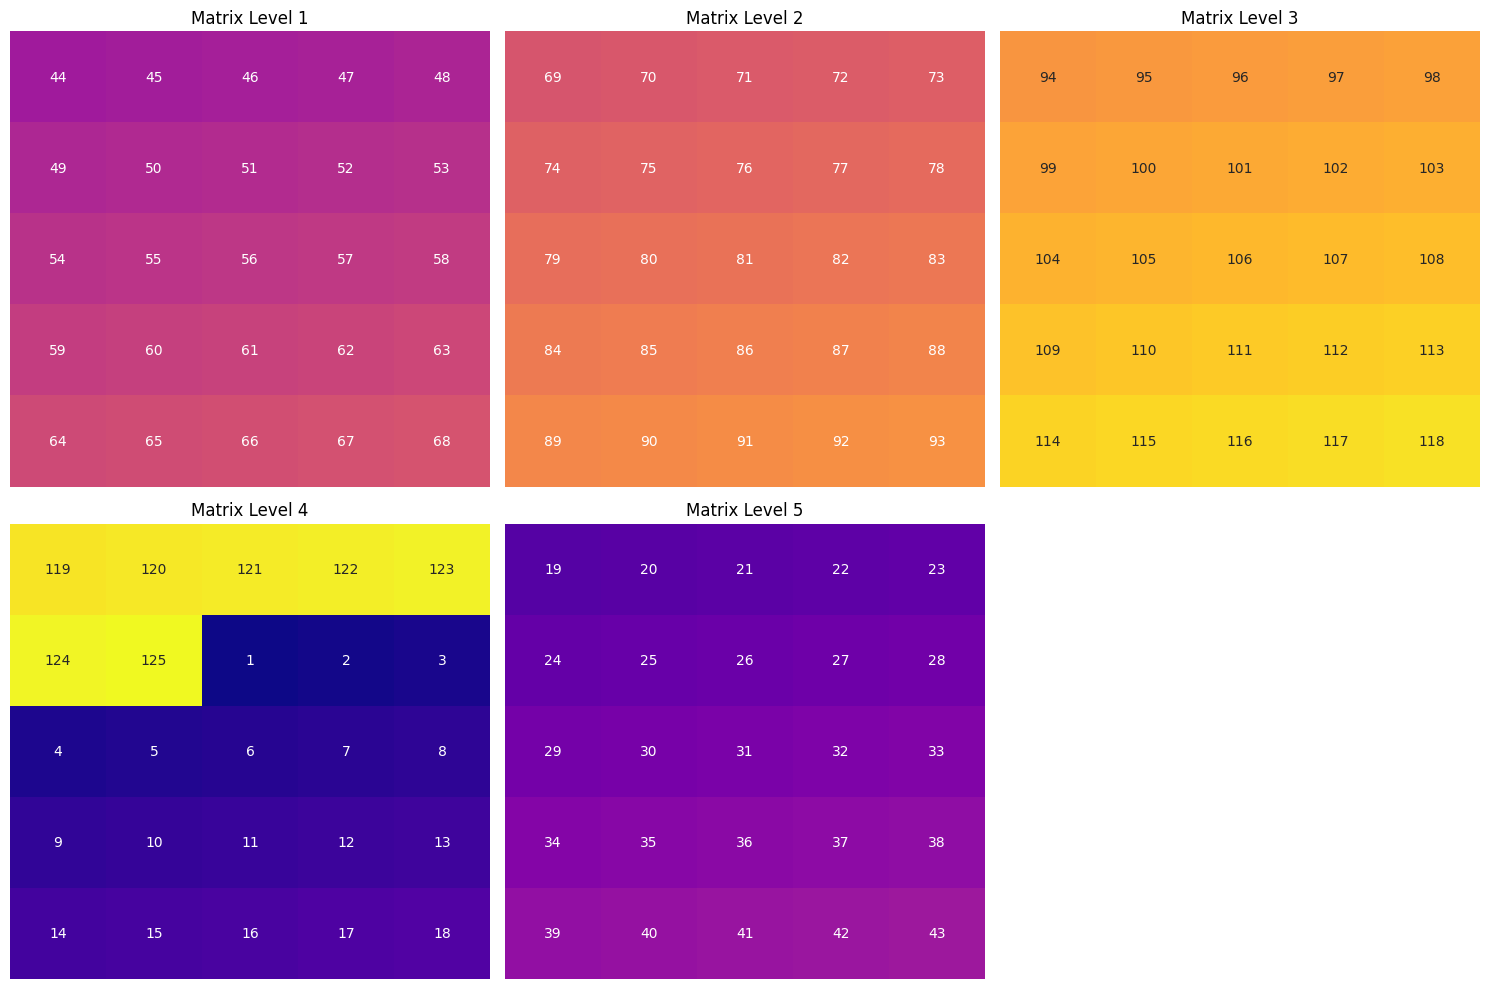

Objective Function Value:  -108


In [17]:
displayMatrixLayers(cubes_each_experiment[1][0])
print("Objective Function Value: ", values_each_experiment[1][0])

#### 1.2.2. Final State

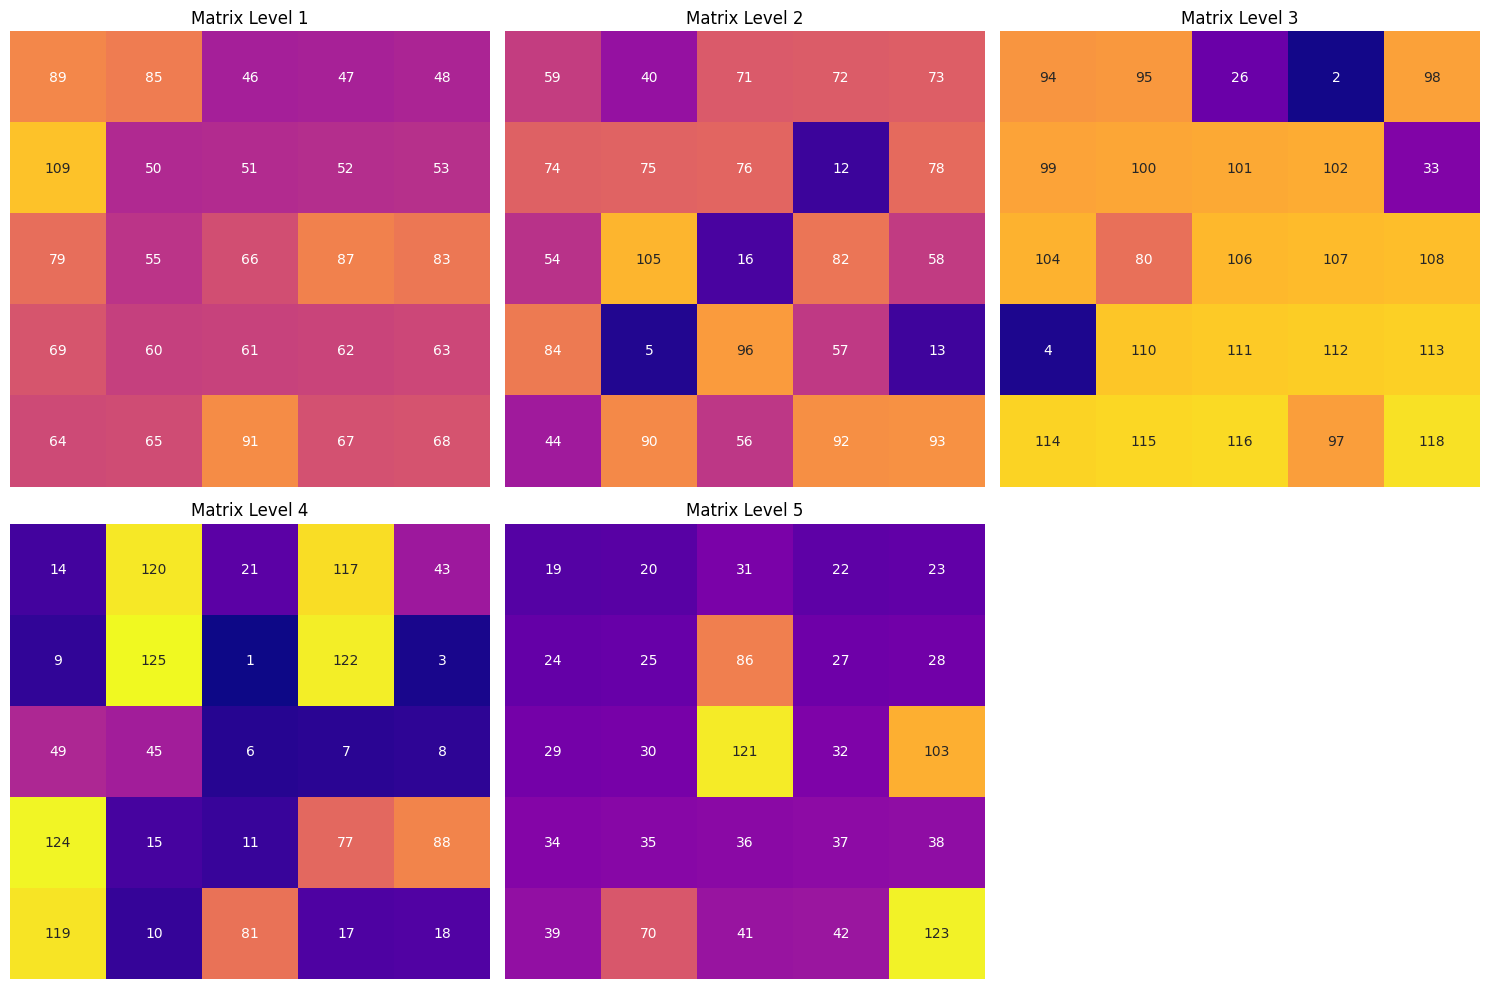

Objective Function Value:  -74


In [18]:
displayMatrixLayers(cubes_each_experiment[1][-1])
print("Objective Function Value: ", values_each_experiment[1][-1])

#### 1.2.3. Objective Function Value Plot on Each Iteration

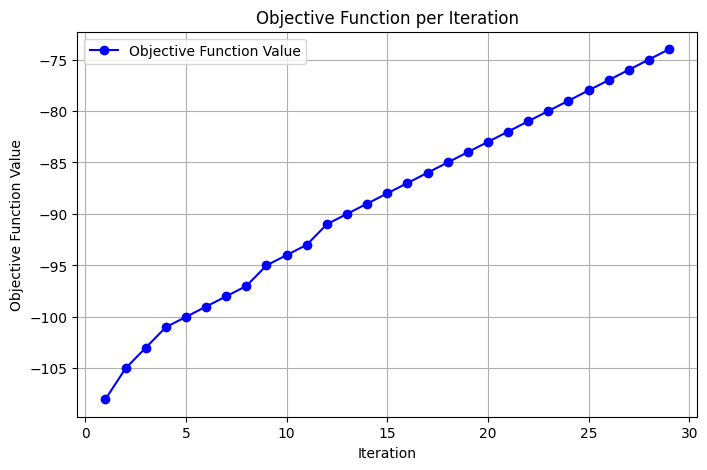

In [19]:
displayPlotValuePerIteration(values_each_experiment[1])

### 1.3. Third Experiment Result

#### 1.3.1. Initial State

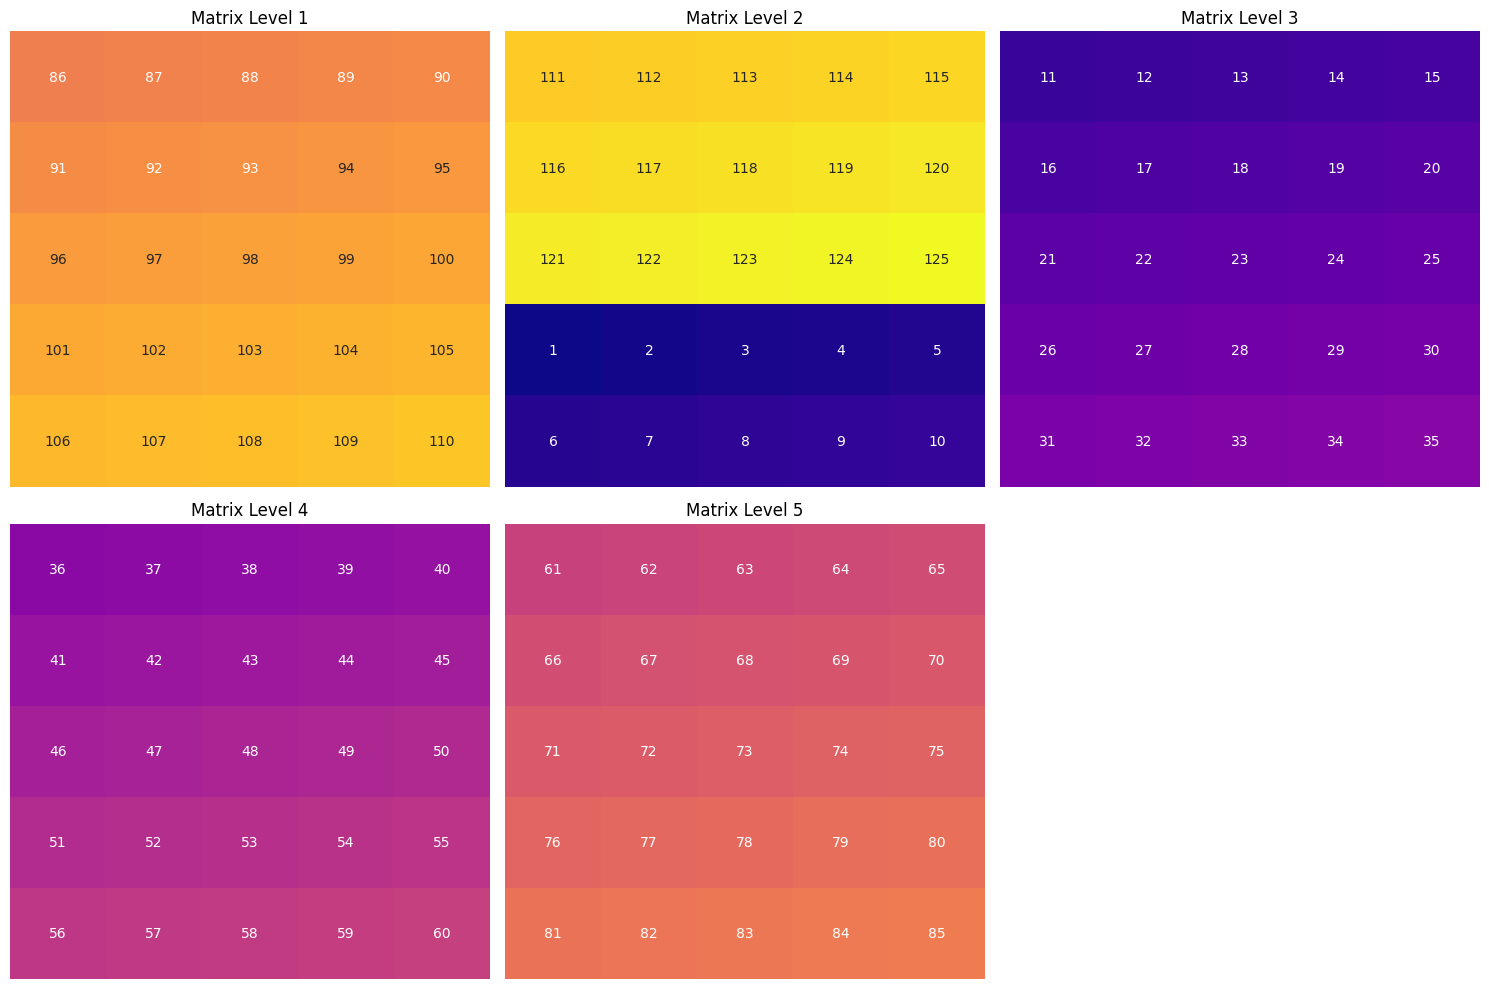

Objective Function Value:  -107


In [20]:
displayMatrixLayers(cubes_each_experiment[2][0])
print("Objective Function Value: ", values_each_experiment[2][0])

#### 1.3.2. Final State

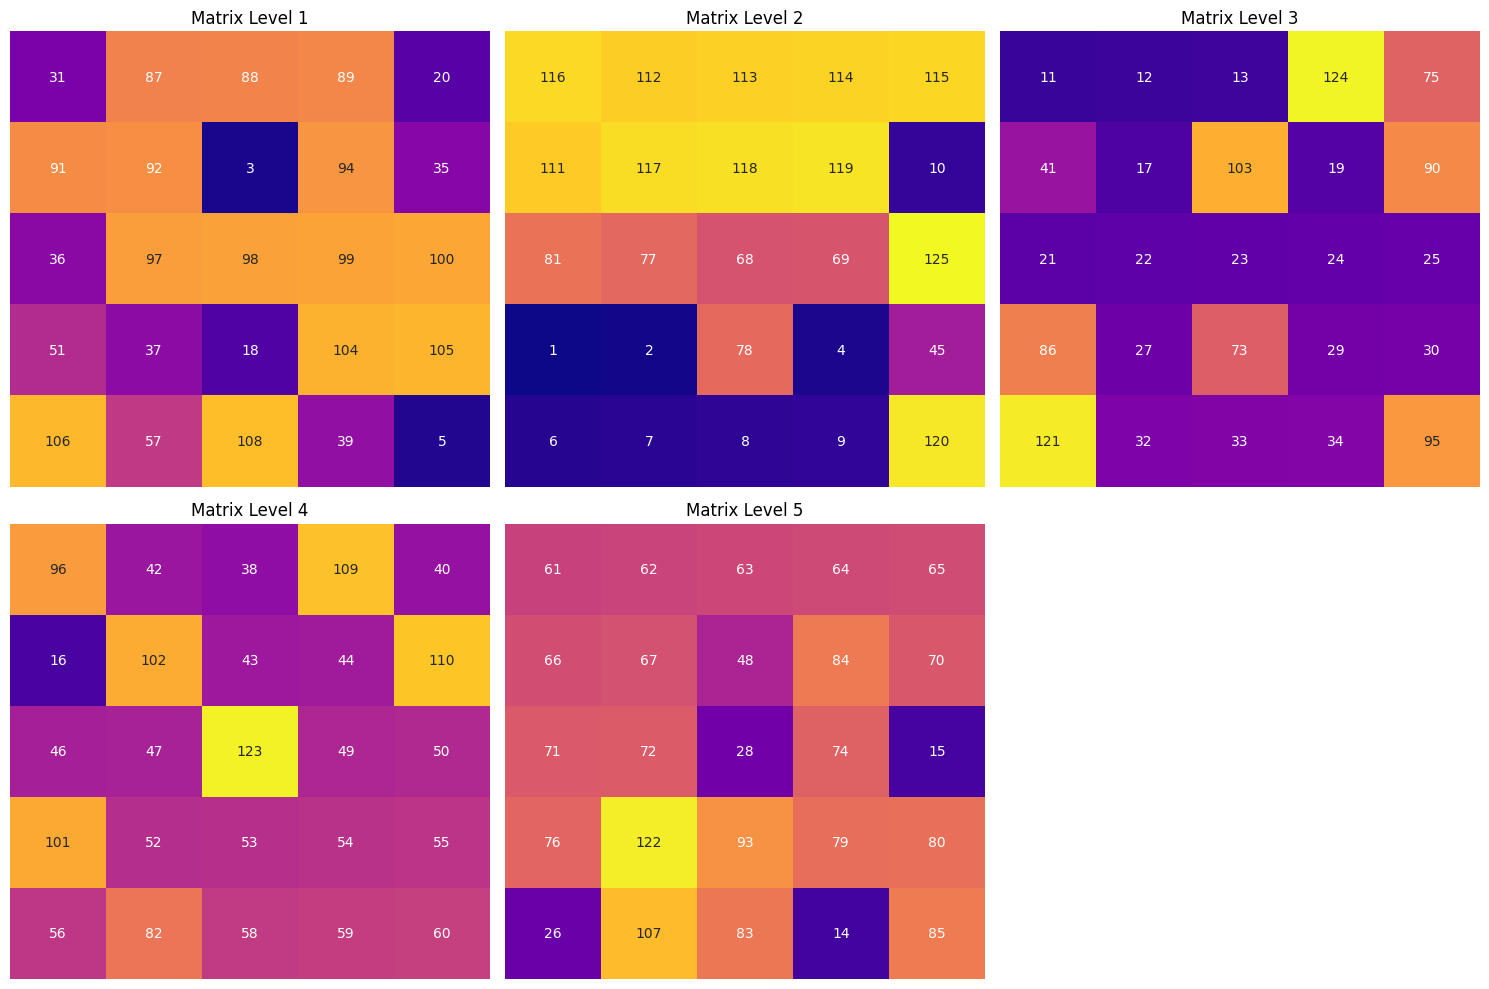

Objective Function Value:  -72


In [21]:
displayMatrixLayers(cubes_each_experiment[2][-1])
print("Objective Function Value: ", values_each_experiment[2][-1])

#### 1.3.3. Objective Function Value Plot on Each Iteration

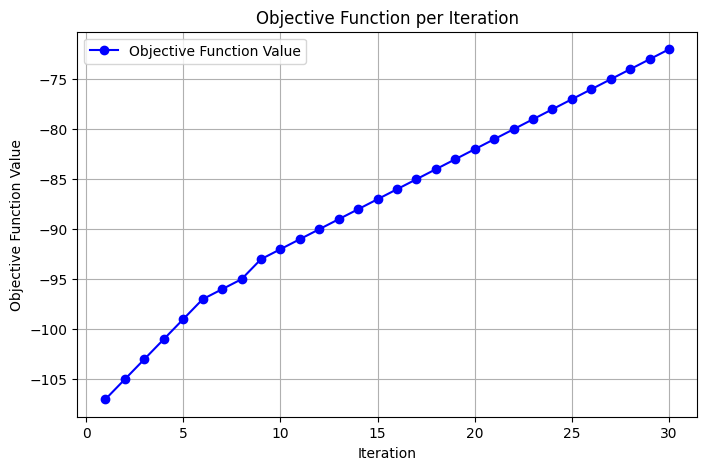

In [22]:
displayPlotValuePerIteration(values_each_experiment[2])

## 2. Hill-climbing with Sideways Move

### 2.0. Program

### 2.1. First Experiment Result

#### 2.1.1. Initial State

#### 2.1.2. Final State

#### 2.1.3. Objective Function Value Plot on Each Iteration

### 2.2. Second Experiment Result

#### 2.2.1. Initial State

#### 2.2.2. Final State

#### 2.2.3. Objective Function Value Plot on Each Iteration

### 2.3. Third Experiment Result

#### 2.3.1. Initial State

#### 2.3.2. Final State

#### 2.3.3. Objective Function Value Plot on Each Iteration

## 3. Random Restart Hill-climbing

### 3.0. Program

### 3.1. First Experiment Result

#### 3.1.1. Initial State

#### 3.1.2. Final State

#### 3.1.3. Objective Function Value Plot on Each Iteration

### 3.2. Second Experiment Result

#### 3.2.1. Initial State

#### 3.2.2. Final State

#### 3.2.3. Objective Function Value Plot on Each Iteration

### 3.3. Third Experiment Result

#### 3.3.1. Initial State

#### 3.3.2. Final State

#### 3.3.3. Objective Function Value Plot on Each Iteration

## 4. Stochastic Hill-climbing

### 4.0. Program

### 4.1. First Experiment Result

#### 4.1.1. Initial State

#### 4.1.2. Final State

#### 4.1.3. Objective Function Value Plot on Each Iteration

### 4.2. Second Experiment Result

#### 4.2.1. Initial State

#### 4.2.2. Final State

#### 4.2.3. Objective Function Value Plot on Each Iteration

### 4.3. Third Experiment Result

#### 4.3.1. Initial State

#### 4.3.2. Final State

#### 4.3.3. Objective Function Value Plot on Each Iteration

## 5. Simulated Annealing

### 5.0. Program

In [ ]:
from SimulatedAnnealing import SimulatedAnnealing
param_initial_T = 500
param_cooling_rate = 0.8
exec_time_each_experiment = []
cubes_each_experiment = []
values_each_experiment = []
iteration_each_experiment = []
e_probs_each_experiment = [] # nilai e^(deltaE/T) per iterasi tiap percobaan
count_stuck_each_experiment = []
for cube in init_cubes:
    start_time = time.perf_counter()
    cubes, values, count_iter, e_probs, count_stuck = SimulatedAnnealing(cube, param_initial_T, param_cooling_rate)
    end_time = time.perf_counter()
    exec_time_each_experiment.append(end_time-start_time)
    
    cubes_each_experiment.append(cubes)
    values_each_experiment.append(values)
    iteration_each_experiment.append(count_iter)
    e_probs_each_experiment.append(e_probs)
    count_stuck_each_experiment.append(count_stuck)

### 5.1. First Experiment Result

#### 5.1.1. Initial State

#### 5.1.2. Final State

#### 5.1.3. Objective Function Value Plot on Each Iteration

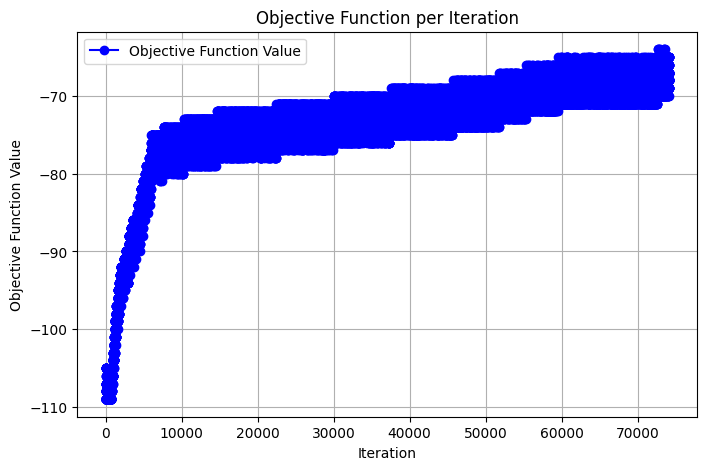

In [8]:
displayPlotValuePerIteration(values_each_experiment[0])

In [10]:
keys = np.array(list(e_probs_each_experiment[1].values()))
print(keys)

[1. 1. 1. ... 0. 0. 0.]


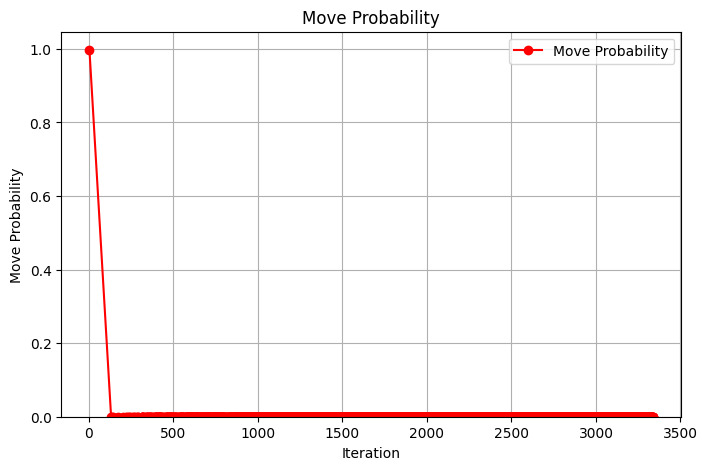

In [10]:
displayPlotProbabilityMove(e_probs_each_experiment[1])

### 5.2. Second Experiment Result

#### 5.2.1. Initial State

#### 5.2.2. Final State

#### 5.2.3. Objective Function Value Plot on Each Iteration

### 5.3. Third Experiment Result

#### 5.3.1. Initial State

#### 5.3.2. Final State

#### 5.3.3. Objective Function Value Plot on Each Iteration

## 6. Genetic Algorithm

### 6.0. Program

### 6.1. First Experiment Result

#### 6.1.1. Initial State

#### 6.1.2. Final State

#### 6.1.3. Objective Function Value Plot on Each Iteration

### 6.2. Second Experiment Result

#### 6.2.1. Initial State

#### 6.2.2. Final State

#### 6.2.3. Objective Function Value Plot on Each Iteration

### 6.3. Third Experiment Result

#### 6.3.1. Initial State

#### 6.3.2. Final State

#### 6.3.3. Objective Function Value Plot on Each Iteration